In [389]:
import numpy as np
import pandas as pd
# Data visualization libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import matplotlib.lines as mlines

import random 
import datetime as dt
import re
import pickle
import nltk, warnings
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import digits, punctuation


from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings("ignore")
#plt.style.use('bmh')
%matplotlib inline

In [262]:
data = pd.read_csv("data.csv",  encoding="ISO-8859-1")

In [404]:
data.drop(data[data['StockCode'] == "POST"].index, inplace  = True)

In [405]:
data.drop(data[data['StockCode'] == "D"].index, inplace  = True)

In [406]:
data['TotalPrice'] =  data['Quantity']*data['UnitPrice']

In [407]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [408]:
data.drop(data[data['TotalPrice'] < 0].index, inplace  = True)

In [268]:
uk_count = data[data['Country'] == 'United Kingdom']['Country'].count()
all_count = data['Country'].count()
uk_perc = uk_count/all_count
print(str('{0:.2f}%').format(uk_perc*100))

91.74%


In [269]:
uk_count = data[data['Country'] != 'United Kingdom']['Country'].count()
all_count = data['Country'].count()
uk_perc = uk_count/all_count
print(str('{0:.2f}%').format(uk_perc*100))

8.26%


In [270]:
data.drop(data[data['Country'] != 'United Kingdom'].index, inplace  = True)

In [271]:
df_cleaned = data.copy()

In [272]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

In [297]:
df_cleaned['Year'] = df_cleaned["InvoiceDate"].apply(lambda x: x.year)
df_cleaned['Month'] = df_cleaned["InvoiceDate"].apply(lambda x: x.month)
df_cleaned['MonthYear'] = df_cleaned["InvoiceDate"].apply(lambda x: x.strftime("%B %Y"))
df_cleaned['Weekday'] = df_cleaned["InvoiceDate"].apply(lambda x: x.weekday())
df_cleaned['Day'] = df_cleaned["InvoiceDate"].apply(lambda x: x.day)
df_cleaned['Hour'] = df_cleaned["InvoiceDate"].apply(lambda x: x.hour)

In [298]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,MonthYear,Weekday,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,December 2010,2,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December 2010,2,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,December 2010,2,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December 2010,2,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December 2010,2,1,8


In [299]:
hourly_sales = df_cleaned.groupby('Hour')['CustomerID'].count().sort_index(ascending=True)
hourly_sales

Hour
6         1
7       214
8      6408
9     17189
10    31363
11    44456
12    66137
13    57901
14    48369
15    41310
16    22322
17    12003
18     2749
19     3094
20      802
Name: CustomerID, dtype: int64

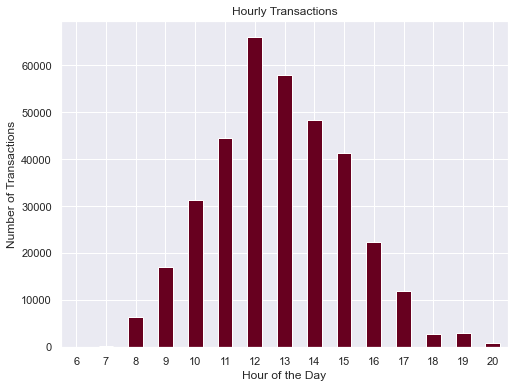

In [388]:
plt.figure(figsize=(8,6))
hourly_sales.plot.bar(rot=0, title="Hourly Transactions", colormap = 'RdBu', grid = True)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.show(block=True)

In [301]:
weekday_sales = df_cleaned.groupby('Weekday')['CustomerID'].count().sort_index(ascending=True)
weekday_sales

Weekday
0    57689
1    59280
2    60950
3    69975
4    46771
6    59653
Name: CustomerID, dtype: int64

No sales happening on saturday as observed from above data

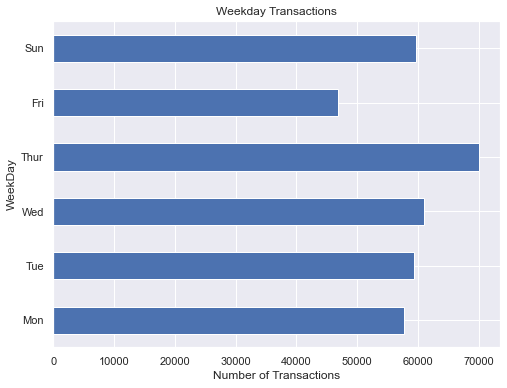

In [387]:
plt.figure(figsize=(8,6))
weekday_sales.plot.barh(rot=0, title="Weekday Transactions", grid = True)
plt.xlabel("Number of Transactions")
plt.ylabel("WeekDay")
ticks = range(0,6)
labels = "Mon Tue Wed Thur Fri Sun".split()
plt.yticks(ticks, labels)
plt.show(block=True)

In [307]:
cleaned_data = df_cleaned[df_cleaned['Country']=='United Kingdom']

In [308]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [309]:
#Invoice Month column
cleaned_data['InvoiceMonth'] = cleaned_data['InvoiceDate'].apply(get_month)

In [310]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,MonthYear,Weekday,Day,Hour,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,December 2010,2,1,8,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December 2010,2,1,8,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,December 2010,2,1,8,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December 2010,2,1,8,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December 2010,2,1,8,2010-12-01


In [311]:
#CohortMonth column by grouping data and selecting the earliest instance in the data. 
cleaned_data['CohortMonth'] = cleaned_data.groupby('CustomerID')['InvoiceMonth'].transform('min')

In [312]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [313]:
#splits invoiced month and data into single variables
invoice_year, invoice_month, _ = get_date(cleaned_data, 'InvoiceMonth')

In [314]:
#splits cohort month and data into single variables
cohort_year, cohort_month, _ = get_date(cleaned_data, 'CohortMonth')

In [315]:
# Creating a variable which holds the differnce between the invoice and cohort year 
year_diff = invoice_year - cohort_year

In [316]:
# Creating a variable which holds the differnce between the invoice and cohort month 
month_diff = invoice_month - cohort_month

In [317]:
#Creating a column that has the calclation shows the 
cleaned_data['CohortIndex'] = year_diff * 12 + month_diff + 1

In [318]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,MonthYear,Weekday,Day,Hour,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,December 2010,2,1,8,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December 2010,2,1,8,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,December 2010,2,1,8,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December 2010,2,1,8,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December 2010,2,1,8,2010-12-01,2010-12-01,1.0


In [319]:
cleaned_data = cleaned_data[cleaned_data.CohortIndex.notnull()]

In [320]:
cleaned_data.shape

(354318, 18)

In [321]:
cleaned_data['CohortIndex'] = cleaned_data['CohortIndex'].astype(int)

In [322]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,MonthYear,Weekday,Day,Hour,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,December 2010,2,1,8,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December 2010,2,1,8,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,December 2010,2,1,8,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December 2010,2,1,8,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,December 2010,2,1,8,2010-12-01,2010-12-01,1


In [323]:
#Group the data by columns CohortMonth','CohortIndex' then aggreate by column 'CustomerID'
cohort_data = cleaned_data.groupby(
    ['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()

In [324]:
cohort_data['CohortMonth'] = cohort_data['CohortMonth'].dt.strftime('%Y-%m-%d')
cohort_data.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,815
1,2010-12-01,2,289
2,2010-12-01,3,263
3,2010-12-01,4,304
4,2010-12-01,5,293


In [325]:
#using the cohort_data and plumb it into a Pivot Table. Setting index, columns and values as below.
cohort_count = cohort_data.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'CustomerID')

In [326]:
#Creating Retention as a percentage
cohort_size = cohort_count.iloc[:,0] #select all the rows : select the first column
retention = cohort_count.divide(cohort_size, axis=0) #Divide the cohort by the first column
retention.round(3) # round the retention to 3 places

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.355,0.323,0.373,0.360,0.396,0.357,0.341,0.355,0.399,0.367,0.497,0.267
2011-01-01,1.0,0.212,0.260,0.235,0.332,0.277,0.251,0.243,0.299,0.327,0.355,0.120,NaN
2011-02-01,1.0,0.188,0.194,0.285,0.288,0.250,0.256,0.282,0.265,0.306,0.074,NaN,NaN
2011-03-01,1.0,0.153,0.260,0.198,0.224,0.165,0.265,0.229,0.284,0.091,NaN,NaN,NaN
2011-04-01,1.0,0.209,0.202,0.217,0.202,0.220,0.220,0.264,0.072,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.188,0.172,0.172,0.207,0.227,0.266,0.090,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.178,0.145,0.238,0.238,0.322,0.098,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.178,0.195,0.231,0.278,0.107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.220,0.227,0.241,0.121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


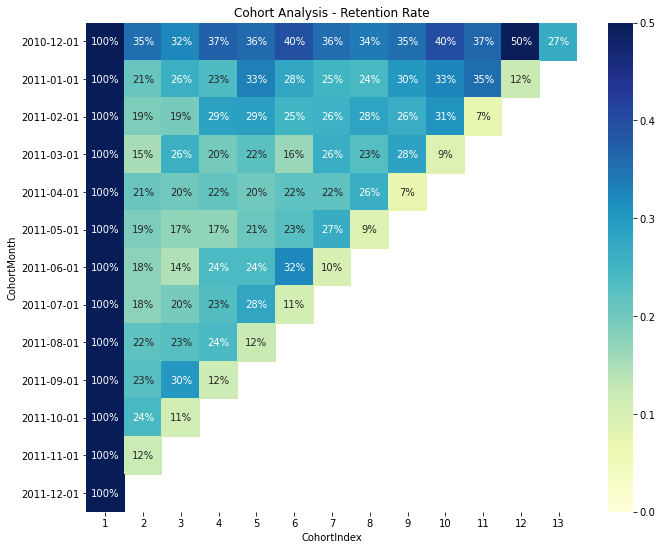

In [327]:
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.show()

In [328]:
cleaned_data.rename(columns={"TotalPrice": "Sales"}, inplace  = True)

In [329]:
df_ts = cleaned_data[['InvoiceDate','Sales']]
df_ts= df_ts.set_index(['InvoiceDate'])

<Figure size 1728x864 with 0 Axes>

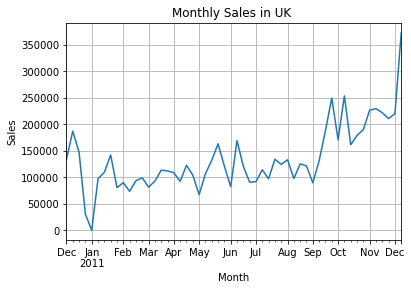

In [330]:
plt.figure(figsize=(24,12))
df_resample = df_ts.resample('W').sum()
df_resample.plot(grid = True, legend = False)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Monthly Sales in UK ")
plt.show()

WHAT IS RFM ?
Recency, Frequency, Monetary (RFM) is a marketing tool that uses historical transactions to group your clients into meaningful categories. It uses three factors:

Recency: How many days ago was their last purchase?

Frequency: How many times has the customer purchased from our store?

Monetary: How much the customer spent?



Interpreting one of these three variables separately does not tell you too much. For instance, a client who made a significant purchase six months ago cannot be identified as an essential customer. However, with a combination of the RFM, called RFM score, it is easier to segment it.

To conduct you RFM analysis, the first step is to rank the three variables with a score of 1 (low) to 5(important) or vice vera. With the variable frequency, score 1 will gather 20% of people who come less, whereas 5 means the customers who shop the most frequently. 
RFM is a powerful tool during your marketing campaign. It tells you which segmented group is more likely to respond to your current campaign, which client they should pay more attention to. Therefore, companies decrease the churn rate, focus on the potential and profitable customers.

In [331]:
data = pd.read_csv("data.csv",  encoding="ISO-8859-1")

In [333]:
#Total Price
data['TotalPrice'] = data['UnitPrice'] * data['Quantity']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,20.34


In [334]:
# Change Data Type:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
 
# Adjust today:
today = dt.datetime(2020,12,16)
print(today)

# Bigger than zero and just UK
data = data[data['Quantity'] > 0]
data = data[data['TotalPrice'] > 0]
data = data[data["Country"] == "United Kingdom"]
data.shape

2020-12-16 00:00:00


(485123, 10)

In [335]:
# Recency and Monetary 
data_x = data.groupby('CustomerID').agg({'TotalPrice': lambda x: x.sum(),
                                        'InvoiceDate': lambda x: (today - x.max()).days})
data_x.head()

,TotalPrice,InvoiceDate
CustomerID,,
12346.0,77183.60,3619
12747.0,4196.01,3296
12748.0,33719.73,3294
12749.0,4090.88,3297
12820.0,942.34,3297


In [336]:
# Dataset is basis on StockCode    
data_y = data.groupby(['CustomerID','InvoiceNo']).agg({'TotalPrice': lambda x: x.sum()})
data_y.head(20)

TotalPrice
CustomerID InvoiceNo            
12346.0    541431       77183.60
12747.0    537215         358.56
           538537         347.71
           541677         303.04
           545321         310.78
           551992         442.96
           554549         328.35
           558265         376.30
           563949         301.70
           569397         675.38
           577104         312.73
           581163         438.50
12748.0    536521           4.95
           536641           4.25
           537136         273.76
           537140          70.42
           537142          41.45
           537155          75.64
           537213           8.65
           537225         496.48

In [337]:
# Find Frequency
data_z = data_y.groupby('CustomerID').agg({'TotalPrice': lambda x: len(x)})
data_z.head()

,TotalPrice
CustomerID,
12346.0,1.0
12747.0,11.0
12748.0,209.0
12749.0,5.0
12820.0,4.0


In [338]:
# RFM Dataframe
rfm_table= pd.merge(data_x,data_z, on='CustomerID')

# Change Column Name
rfm_table.rename(columns= {'InvoiceDate': 'Recency',
                          'TotalPrice_y': 'Frequency',
                          'TotalPrice_x': 'Monetary'}, inplace= True)
rfm_table.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,77183.60,3619,1.0
12747.0,4196.01,3296,11.0
12748.0,33719.73,3294,209.0
12749.0,4090.88,3297,5.0
12820.0,942.34,3297,4.0


In [339]:
def FScore(x,p,d):
    if x <= d[p][0.20]:
        return 0
    elif x <= d[p][0.40]:
        return 1
    elif x <= d[p][0.60]: 
        return 2
    elif x <= d[p][0.80]:
        return 3
    else:
        return 4

quantiles = rfm_table.quantile(q=[0.20,0.40,0.60,0.80])
quantiles = quantiles.to_dict()
rfm_table['Freq_Tile'] = rfm_table['Frequency'].apply(FScore, args=('Frequency',quantiles,))

#Recency 
rfm_table = rfm_table.sort_values('Recency',ascending=True)
rfm_table['Rec_Tile'] = pd.qcut(rfm_table['Recency'],5,labels=False)

#Monetary 
rfm_table['Mone_Tile'] = pd.qcut(rfm_table['Monetary'],5,labels=False)

# adding 1 to the score instead of reflecting 0
rfm_table['Rec_Tile'] = rfm_table['Rec_Tile'] + 1
rfm_table['Freq_Tile'] = rfm_table['Freq_Tile'] + 1
rfm_table['Mone_Tile'] = rfm_table['Mone_Tile'] + 1

# Add to dataframe
rfm_table['RFM Score'] = rfm_table['Rec_Tile'].map(str) + rfm_table['Freq_Tile'].map(str) + rfm_table['Mone_Tile'].map(str)
rfm_table.head()

,Monetary,Recency,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score
CustomerID,,,,,,,
16446.0,168472.50,3294,2.0,2,1,5,125
17389.0,31833.68,3294,34.0,5,1,5,155
13069.0,4436.12,3294,24.0,5,1,5,155
16954.0,2085.08,3294,9.0,5,1,5,155
16558.0,8338.49,3294,20.0,5,1,5,155


In [347]:
#Best customers
rfm_table[rfm_table['RFM Score'] == '555'].sort_values('Monetary', ascending=False)

,Monetary,Recency,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score
CustomerID,,,,,,,
13093.0,7832.47,3569,8.0,5,5,5,555
17850.0,5391.21,3666,34.0,5,5,5,555
17230.0,3638.41,3558,8.0,5,5,5,555
17504.0,2997.03,3500,9.0,5,5,5,555
15235.0,2247.51,3511,12.0,5,5,5,555


In [344]:
#Customers who's recency value is low i.e. on the verge of churning
rfm_table[rfm_table['Rec_Tile'] <= 2 ].sort_values('Monetary', ascending=False)

,Monetary,Recency,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score
CustomerID,,,,,,,
18102.0,259657.30,3294,60.0,5,1,5,155
17450.0,194550.79,3302,46.0,5,1,5,155
16446.0,168472.50,3294,2.0,2,1,5,125
17511.0,91062.38,3296,31.0,5,1,5,155
16684.0,66653.56,3298,28.0,5,1,5,155
...,...,...,...,...,...,...,...
14300.0,43.20,3312,1.0,1,2,1,211
15992.0,41.99,3297,1.0,1,1,1,111
16856.0,35.40,3308,1.0,1,2,1,211


In [351]:
#Customers who's recency, frequency as well as monetary values are low and can be tagged as lost customers
rfm_table[rfm_table['RFM Score'] == '111'].sort_values('Recency',ascending=False)

,Monetary,Recency,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score
CustomerID,,,,,,,
17885.0,190.19,3306,1.0,1,1,1,111
15540.0,213.30,3305,1.0,1,1,1,111
17359.0,127.86,3305,1.0,1,1,1,111
13188.0,114.60,3305,1.0,1,1,1,111
13428.0,218.47,3304,1.0,1,1,1,111
15790.0,220.85,3304,1.0,1,1,1,111
14349.0,133.50,3304,1.0,1,1,1,111
14601.0,213.96,3304,1.0,1,1,1,111
18058.0,170.16,3303,1.0,1,1,1,111


In [359]:
#Customers with high frequency value

rfm_table[rfm_table['Freq_Tile'] >= 3 ].sort_values('Monetary', ascending=False).shape

(1824, 7)

In [360]:
# Calculate RFM_Score
rfm_table['RFM_Sum'] = rfm_table[['Freq_Tile','Rec_Tile','Mone_Tile']].sum(axis=1)
rfm_table.head()

,Monetary,Recency,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score,RFM_Sum
CustomerID,,,,,,,,
16446.0,168472.50,3294,2.0,2,1,5,125,8
17389.0,31833.68,3294,34.0,5,1,5,155,11
13069.0,4436.12,3294,24.0,5,1,5,155,11
16954.0,2085.08,3294,9.0,5,1,5,155,11
16558.0,8338.49,3294,20.0,5,1,5,155,11


In [361]:
def rfm_level(df):
    if df['RFM_Sum'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Sum'] >= 8) and (df['RFM_Sum'] < 9)):
        return 'Champions'
    elif ((df['RFM_Sum'] >= 7) and (df['RFM_Sum'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Sum'] >= 6) and (df['RFM_Sum'] < 7)):
        return 'Potential'
    elif ((df['RFM_Sum'] >= 5) and (df['RFM_Sum'] < 6)):
        return 'Promising'
    elif ((df['RFM_Sum'] >= 4) and (df['RFM_Sum'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm_table['RFM_Level'] = rfm_table.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm_table.head()

,Monetary,Recency,Frequency,Freq_Tile,Rec_Tile,Mone_Tile,RFM Score,RFM_Sum,RFM_Level
CustomerID,,,,,,,,,
16446.0,168472.50,3294,2.0,2,1,5,125,8,Champions
17389.0,31833.68,3294,34.0,5,1,5,155,11,Can't Loose Them
13069.0,4436.12,3294,24.0,5,1,5,155,11,Can't Loose Them
16954.0,2085.08,3294,9.0,5,1,5,155,11,Can't Loose Them
16558.0,8338.49,3294,20.0,5,1,5,155,11,Can't Loose Them


In [362]:
rfm_table["RFM_Level"].value_counts()

Can't Loose Them      1992
Loyal                  645
Champions              543
Potential              358
Promising              236
Needs Attention        118
Require Activation      28
Name: RFM_Level, dtype: int64

In [363]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm_table.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency Monetary      
                      mean      mean     mean count
RFM_Level                                          
Can't Loose Them    3365.9       6.9   3229.3  1992
Champions           3437.1       1.9    867.5   543
Loyal               3455.1       1.4    327.9   645
Needs Attention     3312.2       1.1    180.1   118
Potential           3362.5       1.3    309.9   358
Promising           3327.5       1.3    240.0   236
Require Activation  3300.5       1.0    153.9    28


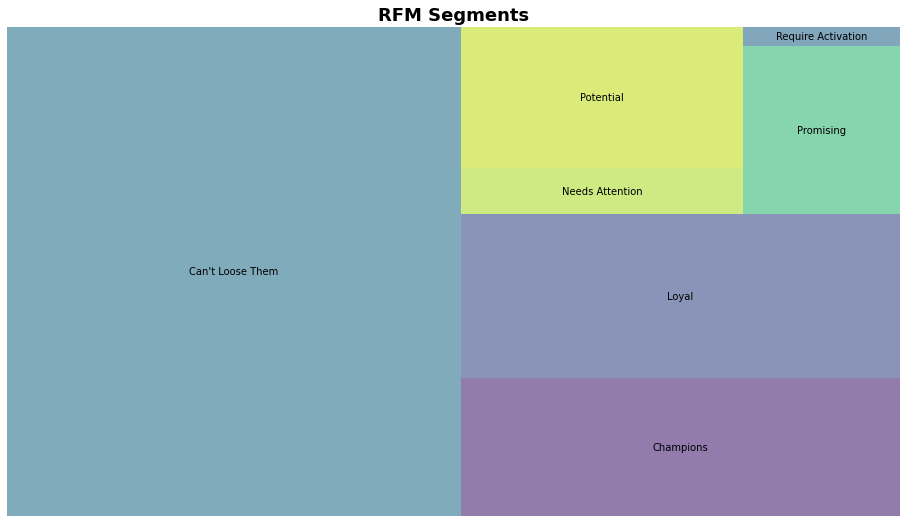

In [368]:
import squarify
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [369]:
rfm_table_df = rfm_table.copy()
rfm_table_df = rfm_table_df.reset_index()

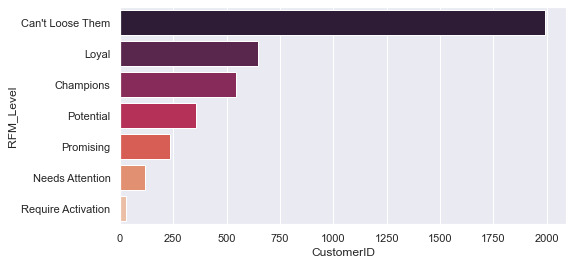

In [370]:
plo1 = rfm_table_df.groupby('RFM_Level')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
sns.set(rc={'figure.figsize':(8, 4)})
sns.barplot(data=plo1, x = 'CustomerID', y = 'RFM_Level', palette = 'rocket', orient = 'h')
plt.show()

In [371]:
clients = rfm_table[['RFM_Level', 'Frequency', 'Monetary', 'Recency']].groupby('RFM_Level').mean()
clients.reset_index(inplace = True)

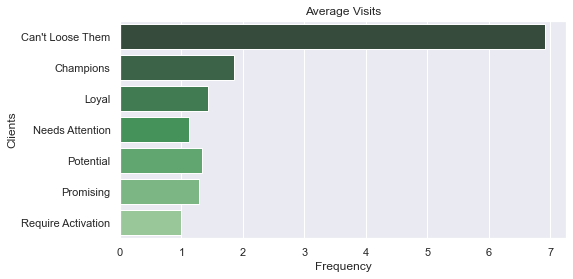

In [373]:
#Averaege visits of customers
ax = sns.barplot(x="Frequency", y="RFM_Level", data=clients, palette = 'Greens_d')
ax.set_ylabel('Clients')
ax.set_title('Average Visits')
plt.show()

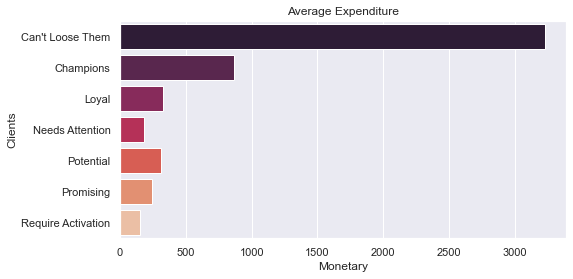

In [375]:
#Averaege spending of customers
ax = sns.barplot(x="Monetary", y="RFM_Level", data=clients, palette = 'rocket')
ax.set_ylabel('Clients')
ax.set_title('Average Expenditure')
plt.show()

# Post The RFM Analysis customer segmentation is done to analyse the groups 

In [529]:
data = pd.read_csv("data.csv",  encoding="ISO-8859-1")

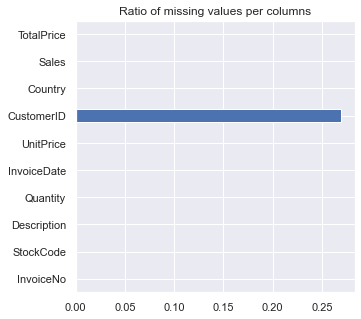

In [395]:
plt.figure(figsize=(5, 5))
data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")
plt.show()

In [522]:
#Dropping the mmissing values in customer id column
data = data.dropna(subset=["CustomerID"])

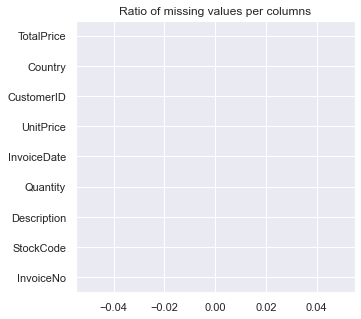

In [533]:
plt.figure(figsize=(5, 5))
data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")
plt.show()

In [534]:
#dropping the duplicate entries
print('Duplicate entries: {}'.format(data.duplicated().sum()))
data.drop_duplicates(inplace = True)

Duplicate entries: 5225


In [535]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})

In [538]:
nb_products_per_basket.InvoiceNo = nb_products_per_basket.InvoiceNo.astype(str)
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))
len(nb_products_per_basket[nb_products_per_basket['order_canceled']==1])/len(nb_products_per_basket)*100

16.466876971608833

16% of the transactions were cancelled

In [542]:
nb_products_per_basket[nb_products_per_basket['order_canceled']==1][:10]

,CustomerID,InvoiceNo,Number of products,order_canceled
1,12346.0,C541433,1,1
23,12352.0,C545329,2,1
24,12352.0,C545330,1,1
25,12352.0,C547388,7,1
39,12359.0,C549955,2,1
40,12359.0,C580165,4,1
55,12362.0,C544902,2,1
56,12362.0,C563752,3,1
57,12362.0,C579178,3,1
66,12365.0,C544577,1,1


In [549]:
data[data['CustomerID'].isin([12346])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,-77183.6


Looks like there is a counterpart for the cancelled transaction

In [641]:
df_cleaned = data.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  data.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = data[(data['CustomerID'] == col['CustomerID']) &
                         (data['StockCode']  == col['StockCode']) & 
                         (data['InvoiceDate'] < col['InvoiceDate']) & 
                         (data['Quantity']   > 0)].copy()
    #_________________________________
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    #________________________________
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    #______________________________________________________________
    # Various counterparts exist in orders
    elif (df_test.shape[0] > 1):
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break    

In [642]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]

In [643]:
df_cleaned.drop(remaining_entries.index, axis = 0, inplace = True)

In [644]:
df_cleaned['TotalPrice'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])

In [645]:
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'POST']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'D']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'C2']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'M']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'BANK CHARGES']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'PADS']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'DOT']

In [646]:
label = LabelEncoder()
label.fit(data_clean['Country'])

LabelEncoder()

In [647]:
l = [i for i in range(37)]
dict(zip(list(le.classes_), l))

{'Australia': 0,
 'Austria': 1,
 'Bahrain': 2,
 'Belgium': 3,
 'Brazil': 4,
 'Canada': 5,
 'Channel Islands': 6,
 'Cyprus': 7,
 'Czech Republic': 8,
 'Denmark': 9,
 'EIRE': 10,
 'European Community': 11,
 'Finland': 12,
 'France': 13,
 'Germany': 14,
 'Greece': 15,
 'Iceland': 16,
 'Israel': 17,
 'Italy': 18,
 'Japan': 19,
 'Lebanon': 20,
 'Lithuania': 21,
 'Malta': 22,
 'Netherlands': 23,
 'Norway': 24,
 'Poland': 25,
 'Portugal': 26,
 'RSA': 27,
 'Saudi Arabia': 28,
 'Singapore': 29,
 'Spain': 30,
 'Sweden': 31,
 'Switzerland': 32,
 'USA': 33,
 'United Arab Emirates': 34,
 'United Kingdom': 35,
 'Unspecified': 36}

In [648]:
df_cleaned['Country'] = le.transform(df_cleaned['Country'])

In [649]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,35,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,35,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,35,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,35,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,35,20.34,0


In [650]:
NOW = dt.datetime(2020,12,16)
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

In [651]:
custom_aggregation = {}
custom_aggregation["InvoiceDate"] = lambda x:x.iloc[0]
custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["TotalPrice"] = "sum"


rfmTable = df_cleaned.groupby("InvoiceNo").agg(custom_aggregation)

In [652]:
rfmTable["Recency"] = NOW - rfmTable["InvoiceDate"]
rfmTable["Recency"] = pd.to_timedelta(rfmTable["Recency"]).astype("timedelta64[D]")

In [653]:
custom_aggregation = {}

custom_aggregation["Recency"] = ["min", "max"]
custom_aggregation["InvoiceDate"] = lambda x: len(x)
custom_aggregation["TotalPrice"] = "sum"

rfmTable_final = rfmTable.groupby("CustomerID").agg(custom_aggregation)

In [654]:
rfmTable_final.columns = ["min_recency", "max_recency", "frequency", "monetary_value"]

In [655]:
rfmTable_final[rfmTable_final['frequency'] == rfmTable_final['frequency'].max()]

,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
12748.0,3294.0,3667.0,206,30064.95


In [656]:
rfmTable_final[rfmTable_final['monetary_value'] == rfmTable_final['monetary_value'].max()]

,min_recency,max_recency,frequency,monetary_value
CustomerID,,,,
14646.0,3295.0,3648.0,73,278742.02


Customer ID 12748 had the maximum frequency and customer Id 14646 spent the most

In [657]:
quantiles = rfmTable_final.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [658]:
segmented_rfm = rfmTable_final.copy()

In [659]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [660]:
segmented_rfm['r_quartile'] = segmented_rfm['min_recency'].apply(RScore, args=('min_recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,,
12346.0,3619.0,3619.0,1,0.00,4,4,4
12347.0,3296.0,3661.0,7,4310.00,1,1,1
12348.0,3369.0,3652.0,4,1437.24,3,2,2
12349.0,3312.0,3312.0,1,1457.55,2,4,2
12350.0,3604.0,3604.0,1,294.40,4,4,4


In [661]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
12346.0,3619.0,3619.0,1,0.00,4,4,4,444
12347.0,3296.0,3661.0,7,4310.00,1,1,1,111
12348.0,3369.0,3652.0,4,1437.24,3,2,2,322
12349.0,3312.0,3312.0,1,1457.55,2,4,2,242
12350.0,3604.0,3604.0,1,294.40,4,4,4,444


In [662]:
segmented_rfm.head(5)

,min_recency,max_recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,,
12346.0,3619.0,3619.0,1,0.00,4,4,4,444
12347.0,3296.0,3661.0,7,4310.00,1,1,1,111
12348.0,3369.0,3652.0,4,1437.24,3,2,2,322
12349.0,3312.0,3312.0,1,1457.55,2,4,2,242
12350.0,3604.0,3604.0,1,294.40,4,4,4,444


In [663]:
df_cleaned = pd.merge(df_cleaned,segmented_rfm, on='CustomerID')

In [664]:
df_cleaned = df_cleaned.drop(columns=['r_quartile', 'f_quartile', 'm_quartile'])

In [665]:
df_cleaned['Month'] = df_cleaned["InvoiceDate"].map(lambda x: x.month)

In [666]:
df_cleaned['Weekday'] = df_cleaned["InvoiceDate"].map(lambda x: x.weekday())
df_cleaned['Day'] = df_cleaned["InvoiceDate"].map(lambda x: x.day)
df_cleaned['Hour'] = df_cleaned["InvoiceDate"].map(lambda x: x.hour)

In [667]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,QuantityCanceled,min_recency,max_recency,frequency,monetary_value,RFMScore,Month,Weekday,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,35,15.30,0,3666.0,3667.0,34,5322.84,411,12,2,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,35,20.34,0,3666.0,3667.0,34,5322.84,411,12,2,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,35,22.00,0,3666.0,3667.0,34,5322.84,411,12,2,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,35,20.34,0,3666.0,3667.0,34,5322.84,411,12,2,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,35,20.34,0,3666.0,3667.0,34,5322.84,411,12,2,1,8


In [668]:
X = df_cleaned["Description"].unique()

stemmer = nltk.stem.porter.PorterStemmer()
stopword = nltk.corpus.stopwords.words('english')

def stem_and_filter(doc):
    tokens = [stemmer.stem(w) for w in analyzer(doc)]
    return [token for token in tokens if token.isalpha()]

analyzer = TfidfVectorizer().build_analyzer()
CV = TfidfVectorizer(lowercase=True, stop_words="english", analyzer=stem_and_filter, min_df=0.00, max_df=0.3)  
#remove words if it appears in more than 30 % of the corpus
TF_IDF_matrix = CV.fit_transform(X)
print("TF_IDF_matrix :", TF_IDF_matrix.shape, "of", TF_IDF_matrix.dtype)

TF_IDF_matrix : (3871, 1694) of float64


In [669]:
svd = TruncatedSVD(n_components = 100)
normalizer = Normalizer(copy=False)

TF_IDF_embedded = svd.fit_transform(TF_IDF_matrix)
TF_IDF_embedded = normalizer.fit_transform(TF_IDF_embedded)
print("TF_IDF_embedded :", TF_IDF_embedded.shape, "of", TF_IDF_embedded.dtype)

TF_IDF_embedded : (3871, 100) of float64


In [670]:
n_clusters = 135

kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(TF_IDF_embedded)
clusters = kmeans.predict(TF_IDF_embedded)

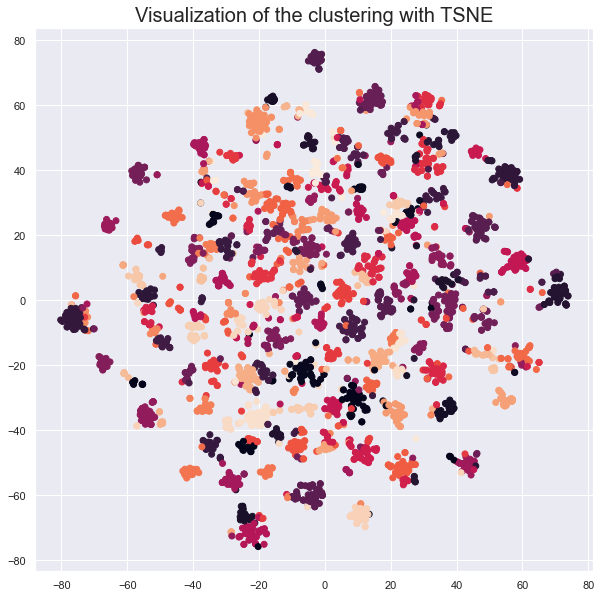

In [671]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(TF_IDF_embedded)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="20")
plt.show()

In [685]:
dict_cluster = {article : cluster for article, cluster in zip(X, clusters)}

In [686]:
Clustertable = df_cleaned.copy()

In [687]:
cluster = Clustertable['Description'].apply(lambda x : dict_cluster[x])
df2 = pd.get_dummies(cluster, prefix="Cluster").mul(Clustertable["TotalPrice"], 0)
df2 = pd.concat([Clustertable['InvoiceNo'], df2], axis=1)
df2_grouped = df2.groupby('InvoiceNo').sum()

In [688]:
df2_grouped.head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,15.30,0.0,25.5,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,11.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,34.75,0.0,0.0,0.0,17.85,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,14.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [689]:
custom_aggregation = {}
custom_aggregation["TotalPrice"] = lambda x:x.iloc[0]
custom_aggregation["min_recency"] = lambda x:x.iloc[0]
custom_aggregation["max_recency"] = lambda x:x.iloc[0]
custom_aggregation["frequency"] = lambda x:x.iloc[0]
custom_aggregation["monetary_value"] = lambda x:x.iloc[0]
custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]


df_grouped = Clustertable.groupby("InvoiceNo").agg(custom_aggregation)

In [690]:
df_grouped.head()

,TotalPrice,min_recency,max_recency,frequency,monetary_value,CustomerID,Quantity,Country
InvoiceNo,,,,,,,,
536365,15.30,3666.0,3667.0,34,5322.84,17850.0,40,35
536366,11.10,3666.0,3667.0,34,5322.84,17850.0,12,35
536367,54.08,3350.0,3667.0,9,3105.70,13047.0,83,35
536368,25.50,3350.0,3667.0,9,3105.70,13047.0,15,35
536369,17.85,3350.0,3667.0,9,3105.70,13047.0,3,35


In [691]:
df2_grouped_final = pd.concat([df_grouped['CustomerID'], df2_grouped], axis=1).set_index("CustomerID").groupby("CustomerID").sum()
df2_grouped_final = df2_grouped_final.div(df2_grouped_final.sum(axis=1), axis=0)
df2_grouped_final = df2_grouped_final.fillna(0)

In [692]:
df2_grouped_final.head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
12347.0,0.0,0.000000,0.0,0.023596,0.0,0.009049,0.0,0.003884,0.0,0.0,...,0.003898,0.000000,0.002088,0.000000,0.000000,0.101717,0.044374,0.000000,0.0,0.018376
12348.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.027553,0.000000,0.000000,0.011828,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
12349.0,0.0,0.004556,0.0,0.012144,0.0,0.000000,0.0,0.049604,0.0,0.0,...,0.000000,0.008748,0.000000,0.000000,0.074015,0.000000,0.008748,0.013584,0.0,0.013584
12350.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [693]:
custom_aggregation = {}
custom_aggregation["TotalPrice"] = ['min','max','mean']
custom_aggregation["min_recency"] = lambda x:x.iloc[0]
custom_aggregation["max_recency"] = lambda x:x.iloc[0]
custom_aggregation["frequency"] = lambda x:x.iloc[0]
custom_aggregation["monetary_value"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]

df_grouped_final = df_grouped.groupby("CustomerID").agg(custom_aggregation)

In [694]:
df_grouped_final.columns = ["min", "max", "mean", "min_recency", "max_recency", "frequency", "monetary_value", "quantity", "country"]

In [695]:
df_grouped_final.head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country
CustomerID,,,,,,,,,
12346.0,0.0,0.0,0.000000,3619.0,3619.0,1,0.00,74215,35
12347.0,13.2,45.0,23.308571,3296.0,3661.0,7,4310.00,2458,16
12348.0,39.6,150.0,82.840000,3369.0,3652.0,4,1437.24,2332,12
12349.0,15.0,15.0,15.000000,3312.0,3312.0,1,1457.55,630,18
12350.0,25.2,25.2,25.200000,3604.0,3604.0,1,294.40,196,24


In [696]:
X1 = df_grouped_final.values
X2 = df2_grouped_final.values

scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X_final_std_scale = np.concatenate((X1, X2), axis=1)

In [701]:
x = list(range(2, 12))
y_std = []
for i in x:
    print("No of clusters =", i)
    
    kmeans = KMeans(init='k-means++', n_clusters = i, n_init=10)
    kmeans.fit(X_final_std_scale)
    clusters = kmeans.predict(X_final_std_scale)
    silhouette_avg = silhouette_score(X_final_std_scale, clusters)
    y_std.append(silhouette_avg)
    print("Silhouette_avg_score :", silhouette_avg)

No of clusters = 2
Silhouette_avg_score : 0.8857267359215136
No of clusters = 3
Silhouette_avg_score : 0.847680355537562
No of clusters = 4
Silhouette_avg_score : 0.2550138894615065
No of clusters = 5
Silhouette_avg_score : 0.3034301210589048
No of clusters = 6
Silhouette_avg_score : 0.38869832944238303
No of clusters = 7
Silhouette_avg_score : 0.3985330525010348
No of clusters = 8
Silhouette_avg_score : 0.4034985481243417
No of clusters = 9
Silhouette_avg_score : 0.400734458152163
No of clusters = 10
Silhouette_avg_score : 0.4143568547100482
No of clusters = 11
Silhouette_avg_score : 0.41046961637045254


In [702]:
kmeans = KMeans(init='k-means++', n_clusters = 8, n_init=30, random_state=0)
kmeans.fit(X_final_std_scale)
clusters = kmeans.predict(X_final_std_scale)

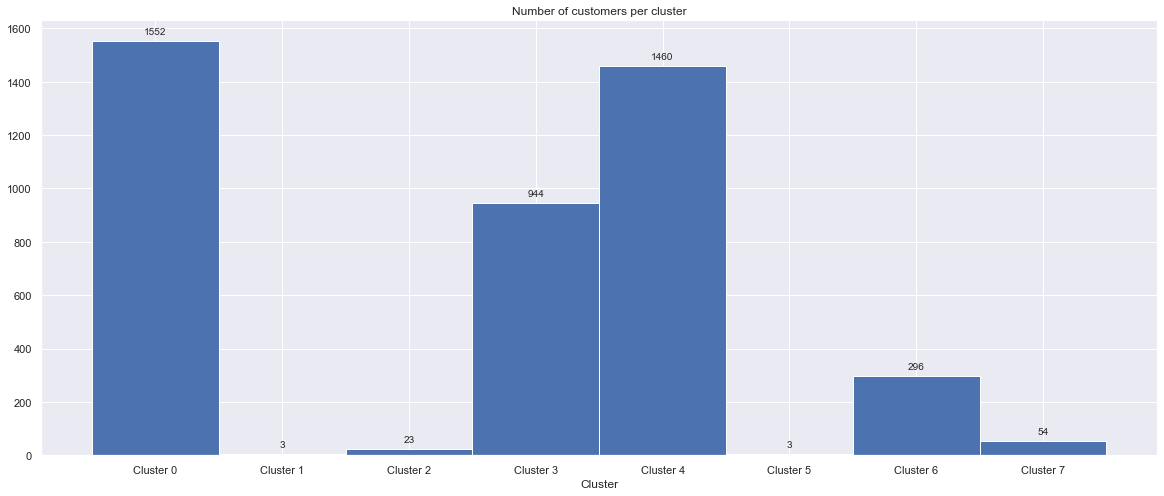

In [703]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(clusters, bins=8)
plt.xlabel("Cluster")
plt.title("Number of customers per cluster")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Cluster {}".format(x) for x in range(8)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [704]:
df_grouped_final["cluster"] = clusters

In [727]:
Cluster_dataset = pd.concat([df_grouped_final, df2_grouped_final], axis = 1)
Cluster_dataset.head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,cluster,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.000000,3619.0,3619.0,1,0.00,74215,35,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
12347.0,13.2,45.0,23.308571,3296.0,3661.0,7,4310.00,2458,16,6,...,0.003898,0.000000,0.002088,0.000000,0.000000,0.101717,0.044374,0.000000,0.0,0.018376
12348.0,39.6,150.0,82.840000,3369.0,3652.0,4,1437.24,2332,12,6,...,0.027553,0.000000,0.000000,0.011828,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
12349.0,15.0,15.0,15.000000,3312.0,3312.0,1,1457.55,630,18,6,...,0.000000,0.008748,0.000000,0.000000,0.074015,0.000000,0.008748,0.013584,0.0,0.013584
12350.0,25.2,25.2,25.200000,3604.0,3604.0,1,294.40,196,24,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [728]:
Cluster_dataset_final = Cluster_dataset.reset_index()

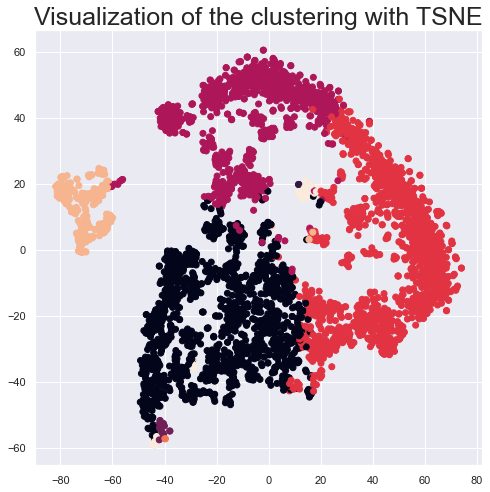

<Figure size 432x288 with 0 Axes>

In [720]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(X_final_std_scale)

plt.figure(figsize=(8,8))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="25")
plt.show()
plt.savefig('cluster.png')

Some Analysis to study the individual clusters to get deeper insights

In [729]:
Cluster_dataset[Cluster_dataset['cluster']==0].head()

,min,max,mean,min_recency,max_recency,frequency,monetary_value,quantity,country,cluster,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12352.0,0.0,35.70,16.842857,3330.0,3590.0,7,1265.41,526,24,0,...,0.049944,0.000000,0.0,0.0,0.025604,0.0000,0.050379,0.015805,0.0,0.000000
12356.0,25.5,102.00,51.300000,3316.0,3619.0,3,2487.43,1573,26,0,...,0.005307,0.000000,0.0,0.0,0.061799,0.0000,0.168266,0.000000,0.0,0.007960
12363.0,15.9,69.36,42.630000,3403.0,3536.0,2,552.00,408,36,0,...,0.000000,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000,0.0,0.000000
12409.0,0.0,79.20,47.200000,3372.0,3476.0,3,11056.93,5551,32,0,...,0.029737,0.004477,0.0,0.0,0.004327,0.0615,0.029683,0.000000,0.0,0.006032
12421.0,9.9,30.00,18.225000,3309.0,3613.0,4,639.04,478,30,0,...,0.000000,0.000000,0.0,0.0,0.152103,0.0000,0.033926,0.000000,0.0,0.000000


In [730]:
Cluster_dataset[Cluster_dataset['cluster']==0].mean()

min              10.375503
max              71.168067
mean             31.179800
min_recency    3330.570876
max_recency    3606.095361
                  ...     
Cluster_130       0.042887
Cluster_131       0.018982
Cluster_132       0.004808
Cluster_133       0.005863
Cluster_134       0.013583
Length: 145, dtype: float64

In [814]:
cust0 = list(Cluster_dataset_final[Cluster_dataset_final['cluster']==0]['CustomerID'])
cluster0 = df_cleaned[df_cleaned['CustomerID'].isin(cust0)]
cluster0[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency'
         , 'monetary_value']].mean()

Quantity              10.268910
UnitPrice              2.899429
QuantityCanceled       0.128748
TotalPrice            17.438463
frequency             11.191347
min_recency         3318.467777
monetary_value      5547.040811
dtype: float64

In [780]:
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster0_grouped = cluster0.groupby("CustomerID").agg(custom_aggregation)

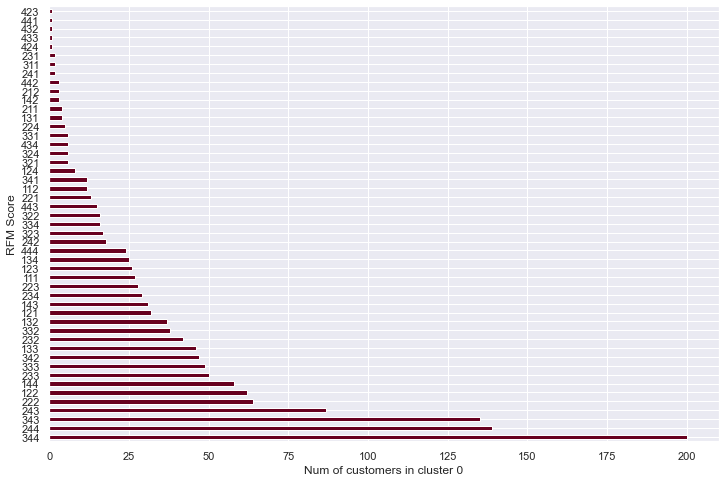

In [810]:
plt.figure(figsize = (12,8))
cluster0_grouped['RFMScore'].value_counts().plot.barh(colormap = 'RdBu')
plt.ylabel("RFM Score")
plt.xlabel("Num of customers in cluster 0")
plt.show()

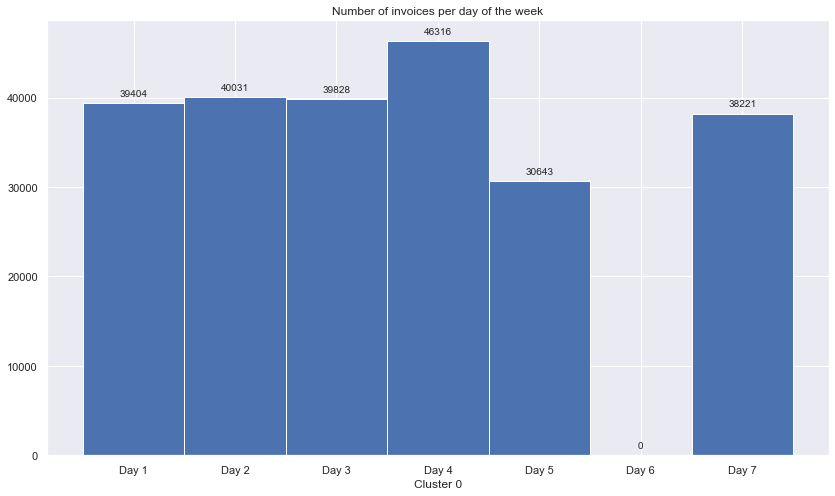

In [767]:
plt.figure(figsize = (14,8))
n, bins, patches = plt.hist(cluster0['Weekday'], bins=7)
plt.xlabel("Cluster 0")
plt.title("Number of invoices per day of the week")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(1, 8)])

for i in patches:
    y_value = i.get_height()
    x_value = i.get_x() + i.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

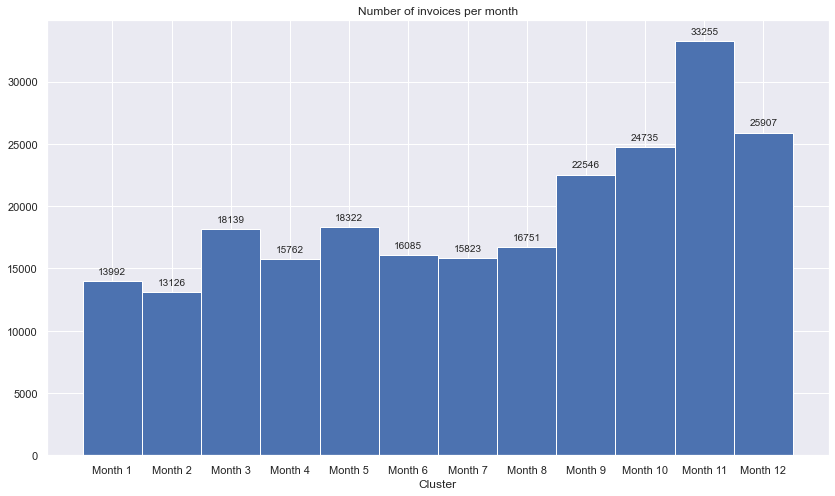

In [768]:
plt.figure(figsize = (14,8))
n, bins, patches = plt.hist(cluster0['Month'], bins=12)
plt.xlabel("Cluster")
plt.title("Number of invoices per month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Month {}".format(x) for x in range(1, 13)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

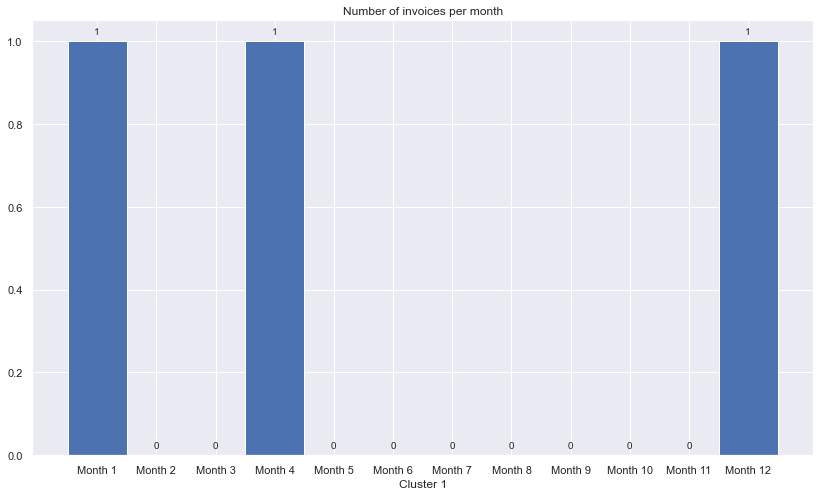

In [770]:
cust0 = list(Cluster_dataset_final[Cluster_dataset_final['cluster']==1]['CustomerID'])
cluster0 = df_cleaned[df_cleaned['CustomerID'].isin(cust0)]
cluster0[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency'
         , 'monetary_value']].mean()

custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster0_grouped = cluster0.groupby("CustomerID").agg(custom_aggregation)

plt.figure(figsize = (14,8))
n, bins, patches = plt.hist(cluster0['Month'], bins=12)
plt.xlabel("Cluster 1")
plt.title("Number of invoices per month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Month {}".format(x) for x in range(1, 13)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

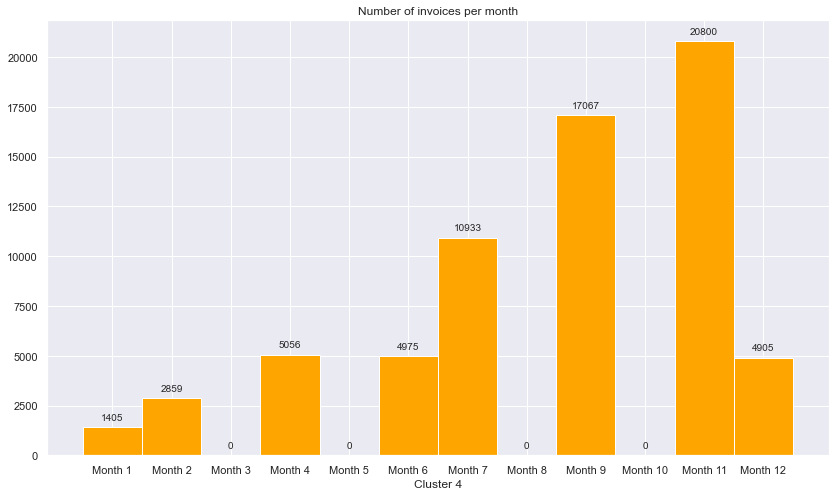

In [818]:
cust0 = list(Cluster_dataset_final[Cluster_dataset_final['cluster']==4]['CustomerID'])
cluster0 = df_cleaned[df_cleaned['CustomerID'].isin(cust0)]
cluster0[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency'
         , 'monetary_value']].mean()

custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster0_grouped = cluster0.groupby("CustomerID").agg(custom_aggregation)

plt.figure(figsize = (14,8))
n, bins, patches = plt.hist(cluster0['Month'], bins=12, color = 'orange')
plt.xlabel("Cluster 4")
plt.title("Number of invoices per month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Month {}".format(x) for x in range(1, 13)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

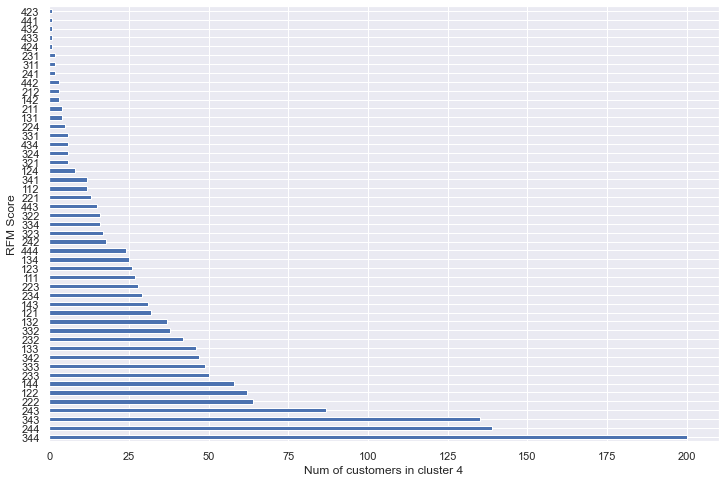

In [819]:
plt.figure(figsize = (12,8))
cluster0_grouped['RFMScore'].value_counts().plot.barh()
plt.ylabel("RFM Score")
plt.xlabel("Num of customers in cluster 4")
plt.show()

In [843]:
cust2 = list(Cluster_dataset_final[Cluster_dataset_final['cluster']==2]['CustomerID'])
cluster2 = df_cleaned[df_cleaned['CustomerID'].isin(cust2)]
cluster2[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalPrice', 'frequency', 'min_recency'
         , 'monetary_value']].mean()

Quantity               29.465542
UnitPrice               2.624968
QuantityCanceled        5.342063
TotalPrice             37.166595
frequency             121.823589
min_recency          3296.675888
monetary_value      61843.237983
dtype: float64

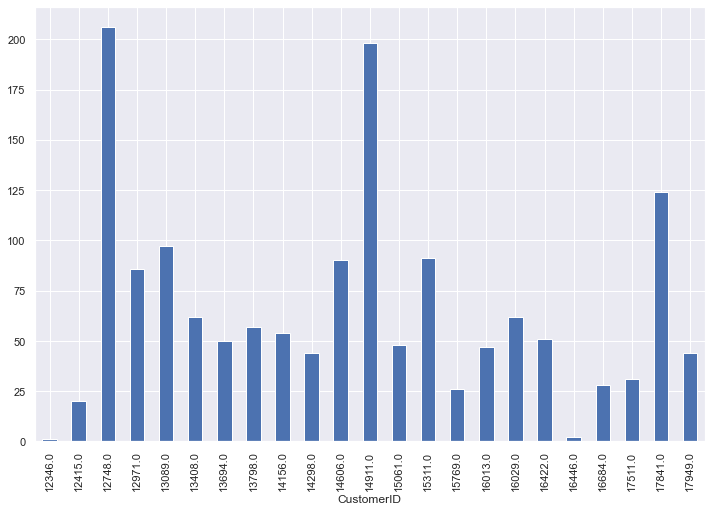

In [842]:
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["frequency"] = lambda x:x.iloc[0]

cluster4_grouped = cluster4.groupby("CustomerID").agg(custom_aggregation)
plt.figure(figsize = (12,8))
cluster4_grouped['frequency'].plot.bar()

Plot the purchase order amount proportion

In [848]:
df_temp = df_cleaned.drop(['StockCode','Description','UnitPrice','Country','Quantity','QuantityCanceled','min_recency','max_recency','frequency','monetary_value','RFMScore','Month','Weekday','Day','Hour'], axis = 1)

In [849]:
df_temp.head()

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [852]:
temp = df_temp.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
Order_price = temp.rename(columns = {'TotalPrice':'Order Price'})

df_temp['InvoiceDate_int'] = df_temp['InvoiceDate'].astype('int64')
temp = df_temp.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_temp.drop('InvoiceDate_int', axis = 1, inplace = True)
Order_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
Order_price = Order_price[Order_price['Order Price'] > 0]
Order_price.sort_values('CustomerID')[:6]

,CustomerID,InvoiceNo,Order Price,InvoiceDate
1,12347.0,537626,711.79,2010-12-07 14:57:00.000001024
2,12347.0,542237,475.39,2011-01-26 14:29:59.999999744
3,12347.0,549222,636.25,2011-04-07 10:42:59.999999232
4,12347.0,556201,382.52,2011-06-09 13:01:00.000000256
5,12347.0,562032,584.91,2011-08-02 08:48:00.000000000
6,12347.0,573511,1294.32,2011-10-31 12:25:00.000001280


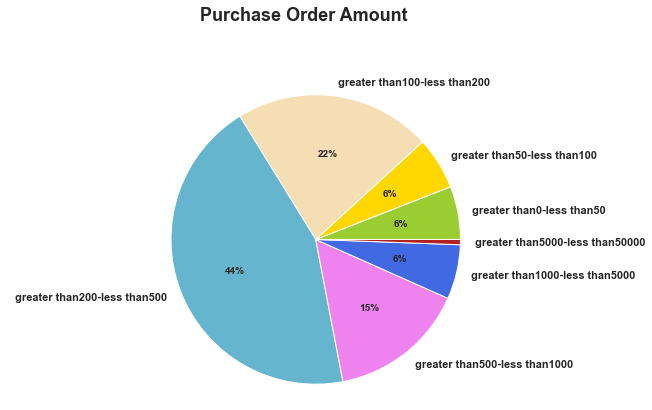

In [857]:
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = Order_price[(Order_price['Order Price'] < price) &
                       (Order_price['Order Price'] > price_range[i-1])]['Order Price'].count()
    count_price.append(val)
      
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ 'greater than{}-less than{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Purchase Order Amount", ha='center', fontsize = 18);